In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)


/var/folders/26/ks0nn6ld0_3fn_thb3prhmgm0000gp/T/ipykernel_36819/376805655.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)



2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()
data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

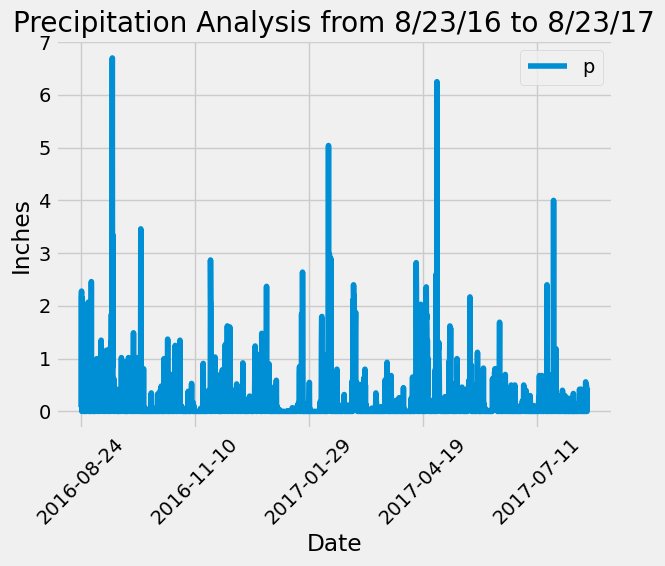

In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_frame = pd.DataFrame(data).fillna(0)

# Sort the dataframe by date
df=data_frame.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date','prcp')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis from 8/23/16 to 8/23/17")
plt.legend("precipitation")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(Measurement).group_by(Measurement.station).count()
print(f'There are total {stations_count} available in this dataset')

There are total 9 available in this dataset


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Station.name, func.count(Measurement.tobs)]
most_active_stations = session.query(*sel).group_by(Station.station).\
               filter(Measurement.station == Station.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

most_active = most_active_stations[0][0]
# List the stations and the counts in descending order.
print(f"The most active station is {most_active}, the active counts are {most_active_stations[0][1]} ")
print("-"*50)
print("Descending order for most active station list")
print("-"*50)
for station, count in most_active_stations:
    print("Station",station,"had",count, "active counts")
    

The most active station is WAIHEE 837.5, HI US, the active counts are 2772 
--------------------------------------------------
Descending order for most active station list
--------------------------------------------------
Station WAIHEE 837.5, HI US had 2772 active counts
Station WAIKIKI 717.2, HI US had 2724 active counts
Station KANEOHE 838.1, HI US had 2709 active counts
Station WAIMANALO EXPERIMENTAL FARM, HI US had 2669 active counts
Station MANOA LYON ARBO 785.2, HI US had 2612 active counts
Station KUALOA RANCH HEADQUARTERS 886.9, HI US had 2202 active counts
Station HONOLULU OBSERVATORY 702.2, HI US had 1979 active counts
Station PEARL CITY, HI US had 1372 active counts
Station UPPER WAHIAWA 874.3, HI US had 511 active counts


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel_1 = [Measurement.station, func.count(Measurement.tobs)]
most_active_stations = session.query(*sel_1).group_by(Measurement.station).\
               filter(Measurement.station == Station.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
most_active = most_active_stations[0][0]

lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    order_by(Measurement.tobs).all()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    order_by(Measurement.tobs).all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    order_by(Measurement.tobs).all() 
                                   
print("The lowest  temperature for station",most_active, "is",lowest_temp[0][0],"degree Fahrenheit")
print("The highest temperature for station",most_active, "is",highest_temp[0][0],"degree Fahrenheit")
print("The average temperature for station",most_active, "is",round(avg_temp[0][0],0),"degree Fahrenheit")

The lowest  temperature for station USC00519281 is 53.0 degree Fahrenheit
The highest temperature for station USC00519281 is 87.0 degree Fahrenheit
The average temperature for station USC00519281 is 73.0 degree Fahrenheit


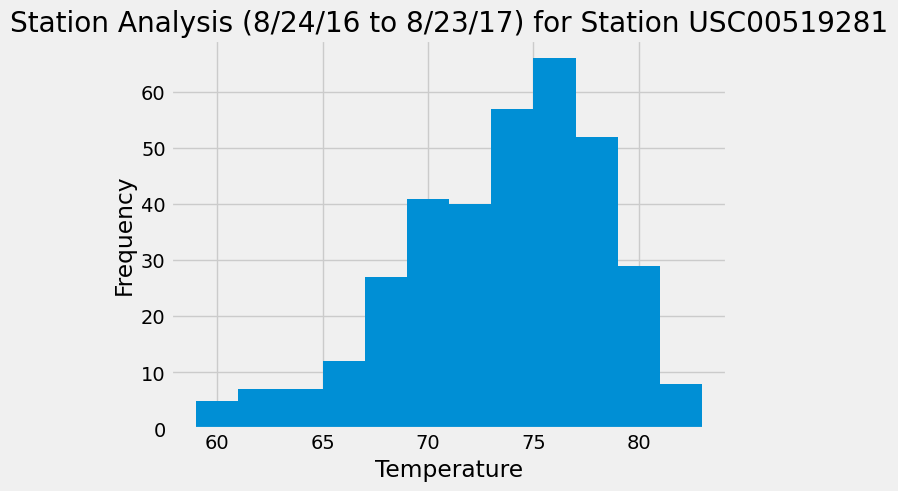

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

temp_df = pd.DataFrame(temp_data)

plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station "+ most_active)
plt.show()

# Close Session

In [23]:
# Close Session
session.close()